In [1]:
# step :01: import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
# step:02: import dataset

In [4]:
cars_data=pd.read_csv(r"C:\Users\PRIYANKA\Data_Science_14_april_jhon\data_Sets\Cars.csv")
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [5]:
# step:03: data understanding

In [6]:
# 3.1 initial analysis

cars_data.shape

(81, 5)

In [7]:
cars_data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [8]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [9]:
# so till here the initial analysis is done as the data is in correct format.
# Each data point is called as an observation

In [10]:
# 3.2 ASSUMPTION CHECK

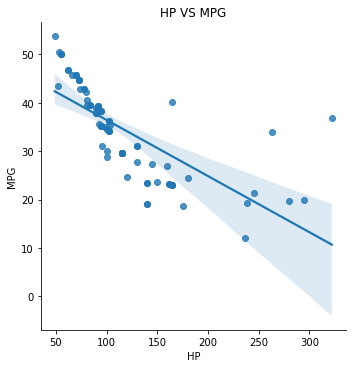

In [11]:
# ASSUMPTION 01: LINEARITY CHECK
# Here we want to check wether HP is linearly related to MPG and VOL is linearly related to MPG  and SPEED OF THE CAR is linearly related to MPG and WEIGHT OF THE CAR is linearly related to MPG.
# If all the features are linearly related we will get the best slope and intercept values in such a case the prediction also will be better.
sns.lmplot(x='HP',y='MPG',data=cars_data)
plt.title("HP VS MPG")
plt.show()


# By picking up two feature we try to check the linear relationship between them.Here As HP increases the MPG decreases.hence it is negatively corelated.
# To check Linearity both the feature should be continuous in nature.
# Here we except exact linearity,all the points should fall on the linear line or near by the linear line.
# Here HP w.r.t MPG ,is not follwing Linearity test.

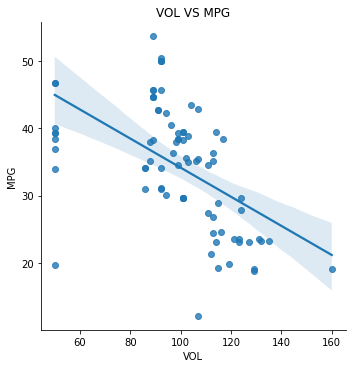

In [12]:
sns.lmplot(x='VOL',y='MPG',data=cars_data)
plt.title("VOL VS MPG")
plt.show()

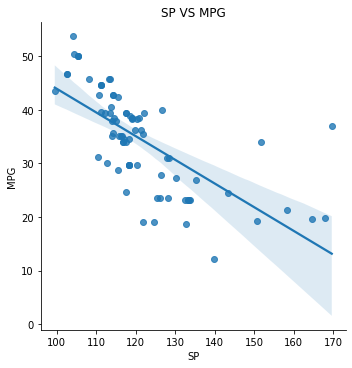

In [13]:
sns.lmplot(x='SP',y='MPG',data=cars_data)
plt.title("SP VS MPG")
plt.show()

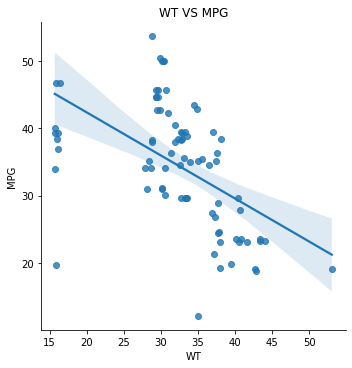

In [14]:
sns.lmplot(x='WT',y='MPG',data=cars_data)
plt.title("WT VS MPG")
plt.show()

In [15]:
# By visualizing the 4 graphs ,as the data points are scattered i.e, the points are not near to the line.
# Hence , The linearity test is failed

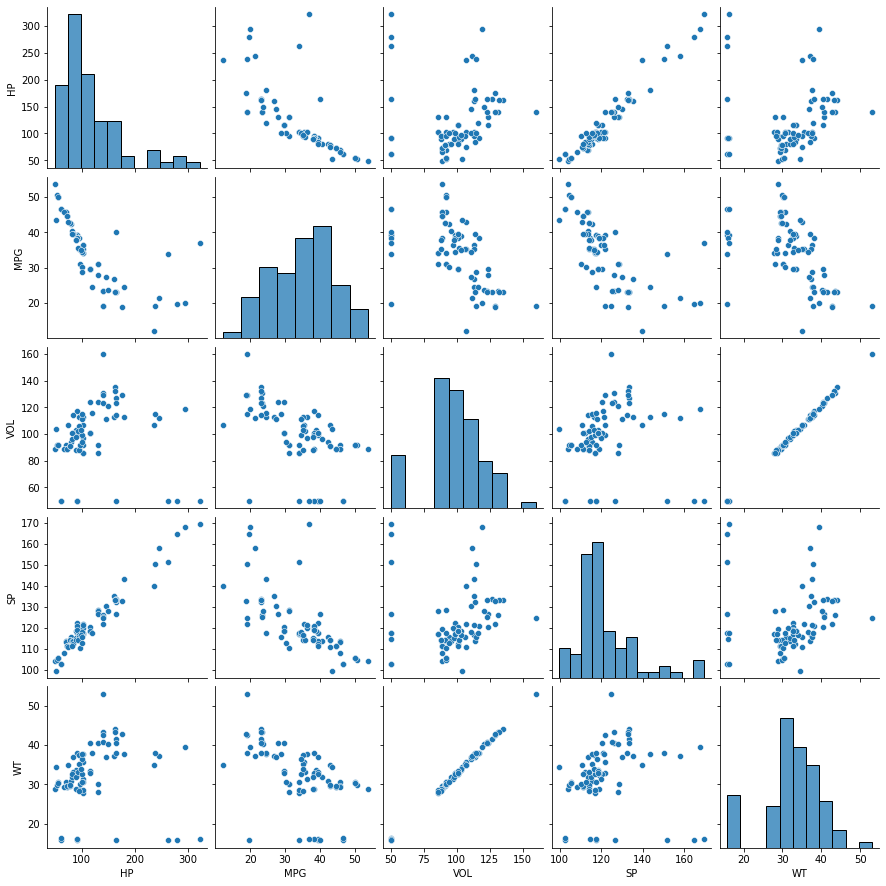

In [16]:
# The other way to check the linearity is by using pair plot.Instead of 4 plots we can quickly check the relation between 2 features in single plot
#Here, In this pair plot we are concerned of the "Y" out put feature w.r.t input features.


sns.pairplot(data=cars_data)
plt.show()

In [17]:
# So, our final observation is ,Linearity check is failed

In [18]:
# ASSUMPTION 02: TEST OF NORMALITY

#To check whether the data is normally distributed.
#By using 2 to 3 techniques we can check whether the data is following Normal distribution or not.
# 1. By using DISTPLOT
# 2. By using PROBPLOT
# 3. By using QQPLOT

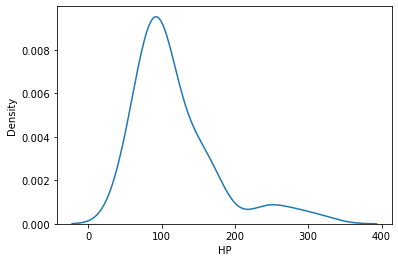

In [19]:
# 2.1 Dist plot

sns.distplot(a=cars_data['HP'],hist=False)
plt.show()

# Here the HP is not following  normally distribution

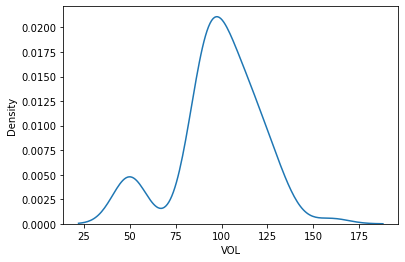

In [20]:
sns.distplot(a=cars_data['VOL'],hist=False)
plt.show()

# Here the VOL is not following  normally distribution

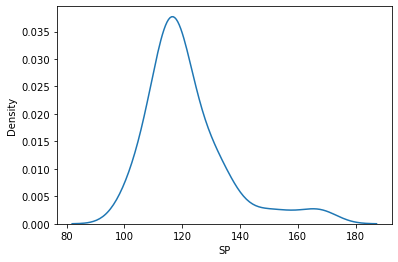

In [21]:
sns.distplot(a=cars_data['SP'],hist=False)
plt.show()

# Here the SP is not following  normally distribution

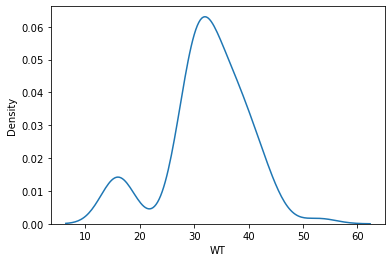

In [22]:
sns.distplot(a=cars_data['WT'],hist=False)
plt.show()

# Here the WT is not following  normally distribution

In [23]:
# So, our final observation is ,normality check is failed

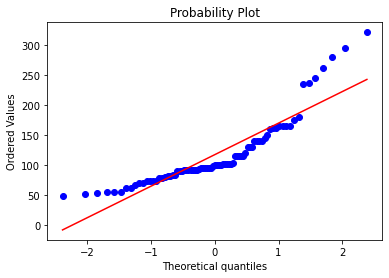

In [24]:
# 2.2 PROB PLOT

stats.probplot(x=cars_data['HP'],dist='norm',plot=plt)
plt.show()

#Here, HP is not following normality

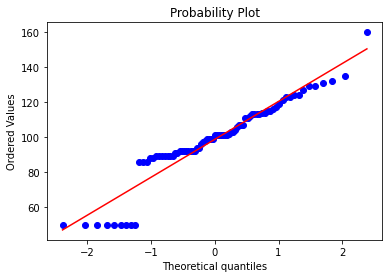

In [25]:
stats.probplot(x=cars_data['VOL'],dist='norm',plot=plt)
plt.show()

#Here, VOL is not following normality

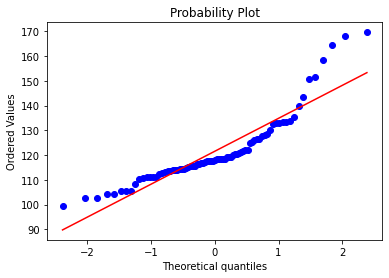

In [26]:
stats.probplot(x=cars_data['SP'],dist='norm',plot=plt)
plt.show()

#Here, SP is not following normality

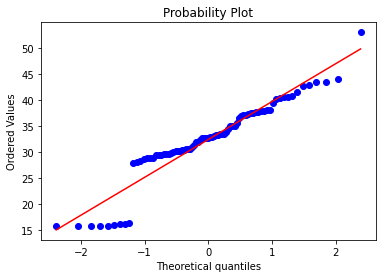

In [27]:
stats.probplot(x=cars_data['WT'],dist='norm',plot=plt)
plt.show()

#Here, WT is not following normality

In [28]:
# So final observation is using prob plot normality test is failed

In [29]:
# ASSUMPTION 03 : MULTICOLLINEARITY TEST

# There should not be any relationship/dependency between the input variables

# By using 2 techniques,

# 1. Correlation Matrix
# 2. Variance Inflation Factor(VIF)

In [30]:
# 3.1 CORRELATION MATRIX

corr_matrix = cars_data.corr().round(2)
corr_matrix

# As is not appealing. We use heatmap to plot the correlation.

,HP,MPG,VOL,SP,WT
HP,1.00,-0.73,0.08,0.97,0.08
MPG,-0.73,1.00,-0.53,-0.69,-0.53
VOL,0.08,-0.53,1.00,0.10,1.00
SP,0.97,-0.69,0.10,1.00,0.10
WT,0.08,-0.53,1.00,0.10,1.00


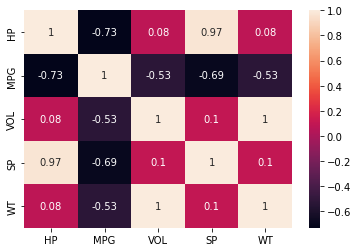

In [31]:
sns.heatmap(data=corr_matrix,annot=True)
plt.show()

#Again,here we are concerned about output i.e, MPG.Here we check wether there is any highest correlation between two features.
# Now, Here we check the relation between input feature vs input feature.
# HP vs VOL no collinearity
# HP vs SP 97% collinearity.So it tells us what ever information HP is trying to convey the same info is conveyed by the SP.So this a problem.
# HP vs WT  no collinearity
# VOL vs WT 100 % collinearity

# So finally what we understood from this is that "HP vs SP" and "VOL vs WT" are highly corelated to each other.So we need to go ahead and drop any one of the features.
# But we are not droping any features as of now,We are using these and going to perform analysis. 

In [32]:
# So final observation is using multicollinearity test is failed.

In [33]:
# ASSUMPTION 04: AUTO REGRESSION

#As there is no time related inputs .Auto regression test is passed.

##### NOTE: Here if any one assumption of Linearity Regression is failed all the other assumptions will also fail simultaneously.

In [34]:
# STEP 04: MODEL BUILDING
# here both the input and output should be in data frame format

X=cars_data.drop(labels=['MPG'],axis=1)# Here for X all the input features are considered
y=cars_data[['MPG']]# Here for y only the output feature will be considered

In [35]:
X

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [36]:
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


In [37]:
# STEP 05: MODEL TRAINING
# Here when we give the same inputs

from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X,y)

LinearRegression()

In [38]:
# STEP 06 : MODEL TESTING
y_pred = linear_model.predict(X)

In [39]:
# STEP 07: MODEL EVALUATION

error = y - y_pred
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


##### NOTE: Here , there is one point to be noted i.e, to perform our next aussumption check i.e,. homoscadasticity all the input fetaures should be in a similar scale. 

##### Because we are taking HP vs error , VOL vs error , SP vs error, WT vs error if all the 4 features are of different scale output y will also get impacted.So we need to make sure that all the input features are of similar scale.

##### The one process we have learnt in statistics  is, if we are able to standardize the input Features mean will be equal to zero and standard deviation is equal to one. i.e., one standard deviation is equal to 1 for all the input features.


##### So we standardize all the input features just to check the Homoscadasticity and how it will work here.

In [40]:
# STEP 08 : STANDARDIZATION
# standardization can be performed using sklearn.preprocessing package and from that we pick Standardscaler.
# Equation of standard scaler (x-mu)/sigma
# Here when we use fit and pass the input X the output will be StandardScaler().But when we use fit_transform it fits the values and also transforms them. 


from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_X=std_scaler.fit_transform(X)
scaled_X

array([[-1.20629511, -0.44061061, -1.23140253, -0.49023816],
       [-1.1005866 , -0.30525236, -1.14087145, -0.26129934],
       [-1.1005866 , -0.30525236, -1.14087145, -0.29799301],
       [-0.83631531, -0.30525236, -0.57323872, -0.2391033 ],
       [-1.13582277, -0.30525236, -1.21182554, -0.33887816],
       [-0.83631531, -0.44061061, -0.59281571, -0.37881419],
       [-1.1005866 , -0.30525236, -1.14087145, -0.28256505],
       [-0.97726   , -2.20026792, -1.34399532, -2.22453536],
       [-0.97726   , -2.20026792, -1.34399532, -2.15581433],
       [-0.66013445, -0.21501352, -0.4182792 , -0.20042158],
       [-0.78346105, -0.44061061, -0.73472389, -0.40949027],
       [-0.44871742, -2.20026792, -0.27968395, -2.23718888],
       [-0.44871742,  0.01058357,  0.04007367,  0.05385348],
       [-0.78346105, -0.44061061, -0.73472389, -0.40746314],
       [-0.90678765, -0.44061061, -0.94758617, -0.41164734],
       [-0.78346105, -0.44061061, -0.73472389, -0.37710085],
       [-0.69537062, -0.

In [41]:
##### As the Standardscaler output is obtained.We need to convert it into DataFrame format for further process.
##### Here the point to be noted is ,when ever we are creating a dataframe we need to give colum namesto it or else by default it will start column names from 0.

scaled_X=pd.DataFrame(data=scaled_X,columns=['HP','VOL','SP','WT'])
scaled_X

,HP,VOL,SP,WT
0,-1.206295,-0.440611,-1.231403,-0.490238
1,-1.100587,-0.305252,-1.140871,-0.261299
2,-1.100587,-0.305252,-1.140871,-0.297993
3,-0.836315,-0.305252,-0.573239,-0.239103
4,-1.135823,-0.305252,-1.211826,-0.338878
...,...,...,...,...
76,3.603442,-2.200268,3.409929,-2.186236
77,2.123523,0.732494,2.060245,0.740025
78,2.563975,-2.200268,2.132755,-2.235028
79,3.127754,0.912972,3.292567,0.941462


In [42]:
# Now as the values are transformed we are going to train the model based on this transformed data.

#Checking after standardization mean should be 0 and std should be 1.

scaled_X.mean()


# hence the mean of all the four input features is 0

HP    -1.041691e-16
VOL    5.825244e-17
SP     1.274701e-15
WT     1.170531e-15
dtype: float64

In [43]:
scaled_X.std()

# And the std of the four input features is 1

HP     1.006231
VOL    1.006231
SP     1.006231
WT     1.006231
dtype: float64

In [44]:
# STEP 09 : Model Training

# Here we are going to fit the scaled features and the output features

from sklearn.linear_model import LinearRegression
linear_model_1=LinearRegression()
linear_model_1.fit(scaled_X,y)

LinearRegression()

In [45]:
# STEP 10:Model testing

#Again here we need to test the data using the scaled input features.

y_pred_1= linear_model_1.predict(scaled_X)

# Here we got the output of Scaled input

In [46]:
# STEP 11: Model Evaluation

error_1 = y-y_pred_1
error_1
# Hence the error is obtained from the data i.e, y actual - y predicted of scaled input

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


In [47]:
# Now , as all the input features are under one scale.We can perform Homoscadasticity check

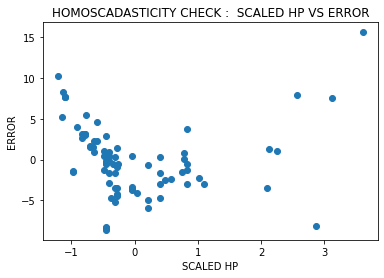

In [48]:
# ASSUMPTION 05 : TEST FOR HOMOSCADASTICITY


plt.scatter(x=scaled_X['HP'],y=error_1)
plt.title("HOMOSCADASTICITY CHECK :  SCALED HP VS ERROR")
plt.xlabel("SCALED HP")
plt.ylabel("ERROR")
plt.show()

#Now when we draw a line at 0 on y-axis ,there is no equal variance above and below the line.
#So, here the homoscadasticity test is failed.
# As there is no similar variance accross the line it called as heteroscedasticity.

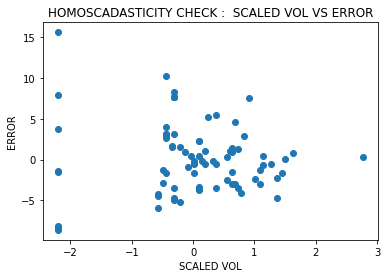

In [49]:
plt.scatter(x=scaled_X['VOL'],y=error_1)
plt.title("HOMOSCADASTICITY CHECK :  SCALED VOL VS ERROR")
plt.xlabel("SCALED VOL")
plt.ylabel("ERROR")
plt.show()

#Similarly,Now when we draw a line at 0 on y-axis ,there is no equal variance above and below the line.
# the upper limit is 15 and lower limit is -5 and the density of points is also not matched.
#So, here the homoscadasticity test is failed.

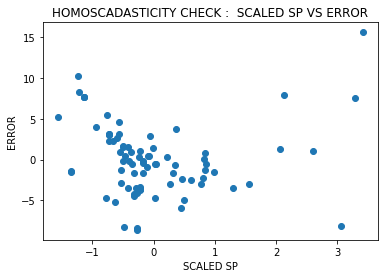

In [50]:
plt.scatter(x=scaled_X['SP'],y=error_1)
plt.title("HOMOSCADASTICITY CHECK :  SCALED SP VS ERROR")
plt.xlabel("SCALED SP")
plt.ylabel("ERROR")
plt.show()

#Here also ,Now when we draw a line at 0 on y-axis ,there is no equal variance above and below the line.
#So, here the homoscadasticity test is failed.


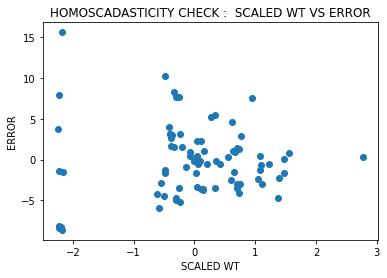

In [51]:
plt.scatter(x=scaled_X['WT'],y=error_1)
plt.title("HOMOSCADASTICITY CHECK :  SCALED WT VS ERROR")
plt.xlabel("SCALED WT")
plt.ylabel("ERROR")
plt.show()

#Here also , Now when we draw a line at 0 on y-axis ,there is no equal variance above and below the line.
#So, here the homoscadasticity test is failed.


In [52]:
# so our observation is homoscedasticity test is failed.

In [53]:
# AASUMPTION 06 : TEST FOR ZERO RESIDUAL MEAN

y

# This is my actual output

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


In [54]:
y_pred_1

array([[43.44193477],
       [42.38879289],
       [42.27934147],
       [42.53835981],
       [42.17264802],
       [43.02061916],
       [42.32536062],
       [48.07621852],
       [48.28120247],
       [40.79122814],
       [41.52153227],
       [47.80956747],
       [39.95980269],
       [41.52757889],
       [41.76632332],
       [41.6181448 ],
       [41.15094046],
       [47.98605515],
       [41.30861046],
       [37.87127922],
       [38.57706414],
       [37.35199705],
       [37.89770285],
       [39.5625144 ],
       [39.93380662],
       [46.73870908],
       [35.48165898],
       [38.78152504],
       [38.24861192],
       [36.00285298],
       [34.84603989],
       [37.21630246],
       [37.13919796],
       [34.82541399],
       [37.22361389],
       [37.53950097],
       [39.27144845],
       [38.24219888],
       [38.54286458],
       [35.9391722 ],
       [34.2129755 ],
       [35.36313259],
       [37.50473376],
       [38.07998482],
       [35.79651664],
       [36

###### NOTE : IF ALL THE ASSUMPTIONS ARE PASSED WE WILL BE GETTING THE BEST SLOPE AND INTERCEPT VALUES  (OR) IF ANY ONE ASSUMPTION IS NOT PASSED  THEN THE SLOPE AND INTERCEPT VALUES GET IMPACTED. 

###### SO ACCORDINGLY THE RESULT WILL GET IMPACTED AND THE PREDICTION WILL GET IMPACTED.

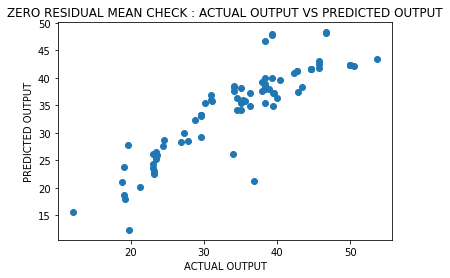

In [55]:
plt.scatter(x=y,y=y_pred_1)
plt.title("ZERO RESIDUAL MEAN CHECK : ACTUAL OUTPUT VS PREDICTED OUTPUT")
plt.xlabel("ACTUAL OUTPUT")
plt.ylabel("PREDICTED OUTPUT")
plt.show()

# So when we are trying to draw a linear line ,the points are scattered .hence here we cannot get zero error here.
# This graph is bit acceptable but we need to still optimize our model.

In [56]:
error_1.mean()

MPG    6.995776e-15
dtype: float64

In [57]:
# So, the zero residual mean check is also failed

In [58]:
# Now we will learn how to otimize model performance and also we will see how the model we built is the best model. 

# So the key is evaluation metrics.So we will look into different evaluation metrics of Regression problem statement.And then we will understand how to optimize the model and normalize the data.
# we will also look into Data transformation techniques.

###### Linear regression can be build using 2 libraries :
###### 1. Statsmodels
###### 2. sklearn

#### NOW LETS BUILD OUR MODEL USING STATS MODELS

In [59]:
# USING STATSMODELS FOR LINEAR REGRESSION

cars_data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [60]:
X=cars_data.drop(labels='MPG',axis=1)
y=cars_data[['MPG']]

In [61]:
# import necessary libraries  and perform model training 
# here we use statsmodels as there are lot of evaluation metrics for linear regression
# While using sklearn library ,for model building we split the data into X and y  and then import linearregression where we create linear regression and initialize to an object and then w.r.t that object using X and y we fit it into LinearRegression().
# But coming to stats model we can use smf.ols technique with in the string we have to give the particular formula i.e. ('output ~ input ') .And then we use .fit
# Here MPG is output and HP,VOL,SP,WT are the input features.



import statsmodels.formula.api as smf
linear_model_2=smf.ols(formula='MPG ~ HP+VOL+SP+WT',data=cars_data).fit()
linear_model_2

In [62]:
# Understanding the evaluation metrics

In [63]:
linear_model_2.params

# when we are having multiple inputs we get slopes for each feature and an intercept as below.
# The equation of MLR is y=BoX1+B1X2+B2X3+B3X4+C


Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [64]:
linear_model_2.pvalues

# In general the pvalue speaks about whether the null hypothesis is accepted or alternate hypothesis is accepted.
# Now what this pvalue signifies is whether the feature is significant or not significant.
# Here we focus on input parameters only because only these feature will have slopes.So the collected parameter is a significant parameter or insignificant parameter we will get to know based on the p value.

# So to know the significance to the parameter we go with the p-value.

# Now keeping level of significance as 5%.We need to create null and alternate hypothesis.

# NULL HYPOTHESIS : The input parameter doesnot make any difference in mileage prediction.Hence the feature X is not significant
# ALTERNATE HYPTHESIS :The input parameter makes a difference in mileage prediction.Hence the input feature is significant.
# At 5% level of significance , If p-value is lessthan 0.05 null hypothesis is rejected and alternate hypothesis is accepted.
# Orelse, the if p-value is greater than 0.05 the null hypothesis is accepted


# now at 5% level of significance HP is 0.00 which means that it is less than 0.05 so we reject the null hypothesis and say HP is a significant feature for MPG prediction.
# now coming to VOL it is not less than 0.05  .So VOL is not a significant parameter for mileage prediction.
# now coming to SP it is less than 0.05 .So SP is a significant parameter for mileage prediction.
# now coming to WT it is greater than 0.05. So WT is not a significant parameter for mileage prediction.


# Based on domain knowledge we know that based on Volume of the car and Weight of the car the MPG decreases /varies.

# NOTE : Simply with theoritical knowledge we should never drop or reject any feature.So in such a case we need to understand why VOL and WT is shown as not a significant feature.
# Here the problem is due to multicollinearity problem the vol and weight of the  according to normal distribution it is showing it is not a significant feature.
# So now lets remove multi collinearity problem .By droping any one of the feature the multi collinearity can be removed.

Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64

In [65]:
# Based on statsmodels - The evaluation metrics of regression problem statement are as follows : 1. p-value 2. r-squared 3.Adj r-squared 4. aic 5. bic

print("R2 SCORE                    :",round(linear_model_2.rsquared,5)) # contribution of input featre towards the prediction.
print("ADJUSTED R2 SCORE           :",round(linear_model_2.rsquared_adj,5))  # contribution of input featre towards the prediction.
print("AIC                         :",round(linear_model_2.aic,5))
print("BIC                         :",round(linear_model_2.bic,5))

# By rsquared score : from this we came to know that together all the 4 input features ,for mileage prediction they contribute 77% .
# Inorder to make it 100% or 95% .The one case is we have to collect some other data or the other case is the data need to follow all the assumptions.
# If the particular HP,VOL,SP,WT is following all the assumptions then the contribution will be definetly increased.
# So, finally rsquare speaks about over contribution of the input features.
# Here ,we also have adjusted rsquare .

# To answer the question how do you say that the model you build is the best model?
# We have to look into all these parameters not only the error we have to look into all the other features before declarig the model is the best model.

R2 SCORE                    : 0.77054
ADJUSTED R2 SCORE           : 0.75846
AIC                         : 477.9279
BIC                         : 489.90015


In [66]:
#Here we are just considering HP as input feature and building the model
import statsmodels.formula.api as smf
model_1 = smf.ols(formula = 'MPG~ HP',data=cars_data).fit()

print("R2 SCORE                    :",round(model_1.rsquared,5)) # contribution of input featre towards the prediction.
print("ADJUSTED R2 SCORE           :",round(model_1.rsquared_adj,5))  # contribution of input featre towards the prediction if it is really required.
print("AIC                         :",round(model_1.aic,5))
print("BIC                         :",round(model_1.bic,5))

#So here the contribution of HP for MPG is 52% only .So,inorder to increase the contribution we need to collect some other features.

R2 SCORE                    : 0.52568
ADJUSTED R2 SCORE           : 0.51968
AIC                         : 530.74527
BIC                         : 535.53417


In [67]:
model_1.summary()

# When we try to check the summary of model we find rsquare,adjusted rsquare,f-statistics,aic,bic,and coeff,HP slope value ,t-value,
# All these are evaluation metrics.Here we just focus on few of them which are very much important and more than sufficient for us to say that any regression problem w.r.t linear regression what ever we have build is the best model.
# The frequently used evaluation metrics will be touched here.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     87.55
Date:                Fri, 20 May 2022   Prob (F-statistic):           1.96e-14
Time:                        18:27:15   Log-Likelihood:                -263.37
No. Observations:                  81   AIC:                             530.7
Df Residuals:                      79   BIC:                             535.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.0392      1.616     29.722      0.000      44.822      51.256
HP            -0.1159      0.012     -9.357      0.000      -0.141      -0.091
==============================================================================
Omnibus:                       20.653   Durbin-Watson:                   1.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.053
Skew:                           0.949   Prob(JB):                     9.00e-09
Kurtosis:                       5.716   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Now we are adding one more feature i.e. VOL
model_2 = smf.ols(formula = 'MPG~ HP+VOL',data=cars_data).fit()

print("R2 SCORE                    :",round(model_2.rsquared,5)) # contribution of input featre towards the prediction.
print("ADJUSTED R2 SCORE           :",round(model_2.rsquared_adj,5))  # contribution of input featre towards the prediction if it is really required.
print("AIC                         :",round(model_2.aic,5))
print("BIC                         :",round(model_2.bic,5))

# When VOL is added to the HP the contibution towards MPG is increased to 75%

R2 SCORE                    : 0.75066
ADJUSTED R2 SCORE           : 0.74427
AIC                         : 480.65692
BIC                         : 487.84027


In [69]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     117.4
Date:                Fri, 20 May 2022   Prob (F-statistic):           2.98e-24
Time:                        18:27:15   Log-Likelihood:                -237.33
No. Observations:                  81   AIC:                             480.7
Df Residuals:                      78   BIC:                             487.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.5864      2.506     26.574      0.000      61.598      71.575
HP            -0.1100      0.009    -12.135      0.000      -0.128      -0.092
VOL           -0.1948      0.023     -8.389      0.000      -0.241      -0.149
==============================================================================
Omnibus:                        4.802   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.006
Skew:                           0.482   Prob(JB):                        0.135
Kurtosis:                       3.506   Cond. No.                         785.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Now we are adding one more feature i.e, SP
model_3 = smf.ols(formula = 'MPG~ HP+VOL+SP',data=cars_data).fit()

print("R2 SCORE                    :",round(model_3.rsquared,5)) # contribution of input featre towards the prediction.
print("ADJUSTED R2 SCORE           :",round(model_3.rsquared_adj,5))  # contribution of input featre towards the prediction.
print("AIC                         :",round(model_3.aic,5))
print("BIC                         :",round(model_3.bic,5))

# When SP is added to the HP+VOL the contibution towards MPG is increased to 77%

R2 SCORE                    : 0.77037
ADJUSTED R2 SCORE           : 0.76142
AIC                         : 475.98752
BIC                         : 485.56531


In [71]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Fri, 20 May 2022   Prob (F-statistic):           1.56e-24
Time:                        18:27:15   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
# Now we are adding one more feature i.e, WT
model_4 = smf.ols(formula = 'MPG~ HP+VOL+SP+WT',data=cars_data).fit()

print("R2 SCORE                    :",round(model_4.rsquared,5)) # contribution of input featre towards the prediction.
print("ADJUSTED R2 SCORE           :",round(model_4.rsquared_adj,5))  # contribution of input featre towards the prediction if it is really required.
print("AIC                         :",round(model_4.aic,5))
print("BIC                         :",round(model_4.bic,5))

# When WT is added to the HP+VOL+SP the contibution towards MPG is again 77%.


R2 SCORE                    : 0.77054
ADJUSTED R2 SCORE           : 0.75846
AIC                         : 477.9279
BIC                         : 489.90015


In [73]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Fri, 20 May 2022   Prob (F-statistic):           1.54e-23
Time:                        18:27:15   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
# Here in model 3 when we look into pvalue alll the 3 input features are significant as pval is less than 0.05 .
# But when we come to model 4 ,VOL and WT are not significant features as pval is greater than 0.05.
# AIC AND BIC talks about impurity and errors of the particular model.So our impurity or error should always be as less as possible.

In [75]:
#NOTE:
#The point to be noted here is when we are adding new input features the rsquare value will be increasing.
# When we add the input the adjusted rsquare also increases,but for model four when the fourth feature WT is added the adjusted rsquare value got decreased.Hence we can say when the new feature is added to find adjusted rsquare if it is really contributing only then it is going to increase.If the new input feature is negatively contributing or if it is not required the adjusted rsquare will decrease.
# aic(AKAIKE INFORMATION CRITERION) : aic value should be as less as possible
# BIC(BAYESIAN INFORMATION CRITERION) : bic should also be less when compared to all other models.
 

# Hence,when taking all the evaluation metrics are taken into consideration and  model_3 is finalized to be the best model.

In [76]:
# We can perform these steps using sklearn library also.But it is more manual process and takes lots of time .So its better to go with statsmodel library as it is easy and it  saves time.

# From sklearn.metrics import ____ we can find all the evaluation functions for regression,claasification and clustering problem statement.Through experience we will come to know all of them which function is for which model.

# In sklearn library we do have some metrics which is not there in statsmodels.Similarly statsmodel have some metrics which are not present in sklearn library.
# for building a model for Linear regression we use both statsmodels and sklearn libraries.But mostly statsmodels play major role.And  sklearn consist of MSE and MAE etc.Here we will learn the math behind MSE and MAE.


# MSE (summation(yactual-ypred)2 / error)is used when there are no outliers in the data.
# MSPE is obtained when MSE is divided by 100.
# MAE (summation(yactual-ypred)/error) is used when there are outliers in the data.
# MAPE is obtained when MAE is divided by 100.
# MSE AND MAE ARE NOTICED WHEN SCATTERPLOY BETWEEN YACTUAL AND Y-PREDICTED IS PLOOTTED

In [77]:
# MODEL SELECTION
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

# random state is to be given ,to make sure the same results are obtained all the time.So as to give  same  samples to training and same samples to testing data for further procedure.Only then the accuracy will be constant.And we can tell to our client that the eroor is so and so like 5% .To make a sense in data we need  to have same set  of samples.

In [78]:
X_train.shape,y_train.shape

((64, 4), (64, 1))

In [79]:
X_test.shape,y_test.shape

((17, 4), (17, 1))

In [80]:
from sklearn.linear_model import LinearRegression
linear_model_3=LinearRegression()

# Training the data ,Here we will have training inputs

linear_model_3.fit(X_train,y_train)

LinearRegression()

In [81]:
# Testing the  data ,here we will have the test inputs

# Model testing

y_pred_train = linear_model_3.predict(X_train)
y_pred_train

array([[38.22675856],
       [22.29165408],
       [ 9.62859802],
       [21.15254378],
       [36.2894155 ],
       [21.16278508],
       [42.90525839],
       [29.55366276],
       [26.90065902],
       [37.8154544 ],
       [25.92135175],
       [38.69098709],
       [41.95968003],
       [33.13137527],
       [41.19937544],
       [36.41513277],
       [42.86201672],
       [26.5347201 ],
       [35.32476208],
       [41.61994029],
       [23.50790982],
       [41.30685881],
       [41.55820167],
       [38.07818929],
       [41.5540797 ],
       [33.19220374],
       [45.73991126],
       [44.01467024],
       [43.01128004],
       [37.14775294],
       [42.65490434],
       [34.94915143],
       [39.93760814],
       [35.75227964],
       [37.79210682],
       [38.83036773],
       [35.92036583],
       [27.81810358],
       [38.26578516],
       [35.33059671],
       [37.91068559],
       [30.18295174],
       [39.49566655],
       [37.74260921],
       [35.79765896],
       [46

In [82]:
y_pred_test=linear_model_3.predict(X_test)
y_pred_test

array([[23.04767717],
       [15.09290051],
       [42.81164374],
       [13.7881422 ],
       [36.21229846],
       [26.11106049],
       [39.57667903],
       [37.7057223 ],
       [24.6532975 ],
       [37.6558578 ],
       [46.86738801],
       [36.18365415],
       [40.87280892],
       [18.03994951],
       [33.13704253],
       [33.18444922],
       [39.73657572]])

In [83]:
# as the training  data prediction and test data prediction is done.We are going to evaluate our model using mean square error and mean absolute square error.

# MODEL EVALUATION

from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [84]:
# Caluculating using mean  square error

# Caluculating the training error

mean_squared_train_error=mean_squared_error(y_train,y_pred_train)
print("MSE :",mean_squared_train_error)
print("MSPE :",(mean_squared_train_error/100))


MSE : 15.926711213210975
MSPE : 0.15926711213210976


In [85]:
# Caluculating the test error

mean_square_test_error=mean_squared_error(y_test,y_pred_test)
print("MSE :",mean_square_test_error)
print("MSPE :",(mean_square_test_error/100))

MSE : 39.54501096258804
MSPE : 0.3954501096258804


In [86]:
# Caluculate using mean absolute error

# Caluculating train error

mean_absolute_train_error=mean_absolute_error(y_train,y_pred_train)
print("MAE :",mean_absolute_train_error)
print("MAPE :",(mean_absolute_train_error/100))

MAE : 3.033669691416168
MAPE : 0.03033669691416168


In [87]:
# Caluculating the test error

mean_absolute_test_error=mean_absolute_error(y_test,y_pred_test)
print("MAE :",mean_absolute_test_error)
print("MAPE :",(mean_absolute_test_error/100))

MAE : 3.7724354085869303
MAPE : 0.0377243540858693


In [88]:
# In general the mean_absolute_error will be always less when compared to MSE as it is no squaring the errors.

#So, as MAE for training and testing are equal, we can tell that it is performing a pretty good job. If we re not satisfied we can go through model optimization techniques as well.

# But this how we perform the evaluation metrics for linear regression.

Text(0, 0.5, 'Y-PREDICTED')

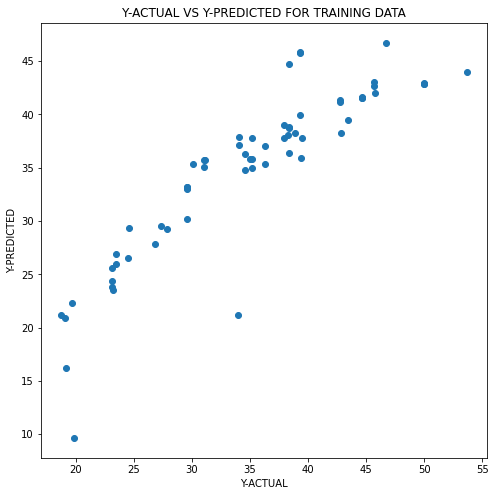

In [89]:
# plotting for MSE
plt.figure(figsize=(8,8))

plt.scatter(x=y_train,y=y_pred_train)
plt.title("Y-ACTUAL VS Y-PREDICTED FOR TRAINING DATA" )
plt.xlabel("Y-ACTUAL")
plt.ylabel("Y-PREDICTED")

Text(0, 0.5, 'Y-PREDICTED')

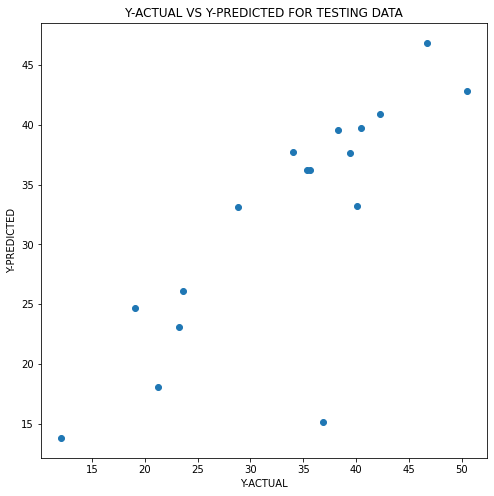

In [90]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=y_pred_test)
plt.title("Y-ACTUAL VS Y-PREDICTED FOR TESTING DATA")
plt.xlabel("Y-ACTUAL")
plt.ylabel("Y-PREDICTED")

In [91]:
# USING SKLEARN AND BUILDING MODEL
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [92]:
# Now we will are Performing model optimization techniques

# As the data is not Linearly related here we perform data transformation techniques.lets use LOG TRANSFORMATION TECHNIQUE.

In [93]:
X_inputs=cars_data.copy()
X_inputs


,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [94]:
X_inputs['log_HP'] =np.log(X_inputs['HP'])
X_inputs['log_SP'] =np.log(X_inputs['SP'])
X_inputs['log_VOL']=np.log(X_inputs['VOL'])
X_inputs['log_WT'] =np.log(X_inputs['WT'])
X_inputs

,HP,MPG,VOL,SP,WT,log_HP,log_SP,log_VOL,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.646172,4.488636,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.658344,4.521789,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.658344,4.521789,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.731461,4.521789,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.648816,4.521789,3.397495
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,5.133434,3.912023,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,5.014472,4.744932,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,5.021236,3.912023,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,5.123633,4.779123,3.674352


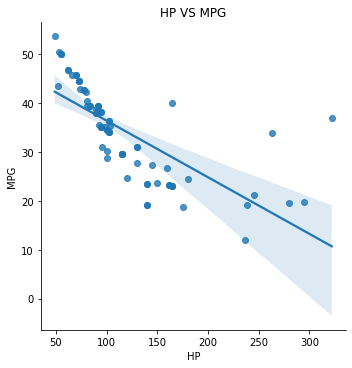

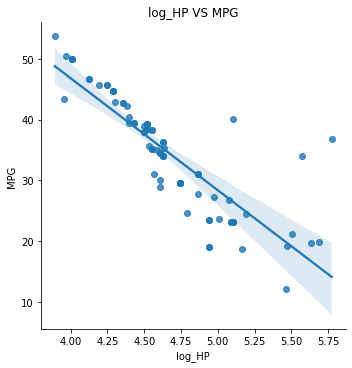

In [95]:
# Now here we will compare "HP vs MPG" and "logHP vs MPG"

sns.lmplot(x="HP",y="MPG",data=X_inputs)
plt.title("HP VS MPG")

sns.lmplot(x="log_HP",y="MPG",data=X_inputs)
plt.title("log_HP VS MPG")
plt.show()

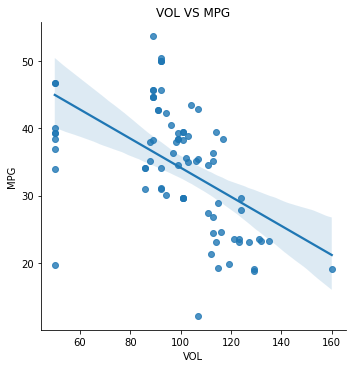

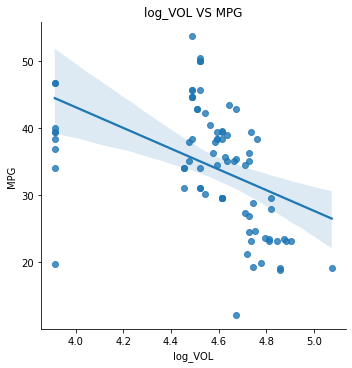

In [96]:
# Now here we will compare "VOL vs MPG" and "logVOL vs MPG"

sns.lmplot(x="VOL",y="MPG",data=X_inputs)
plt.title("VOL VS MPG")

sns.lmplot(x="log_VOL",y="MPG",data=X_inputs)
plt.title("log_VOL VS MPG")
plt.show()

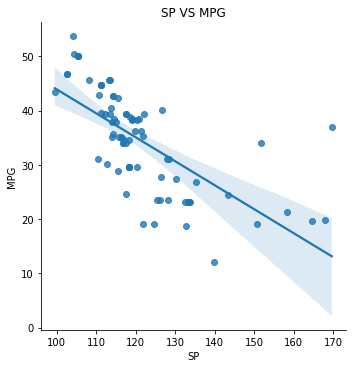

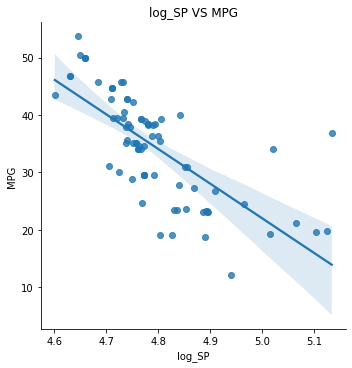

In [97]:
# Now here we will compare "SP vs MPG" and "logSP vs MPG"

sns.lmplot(x="SP",y="MPG",data=X_inputs)
plt.title("SP VS MPG")

sns.lmplot(x="log_SP",y="MPG",data=X_inputs)
plt.title("log_SP VS MPG")
plt.show()

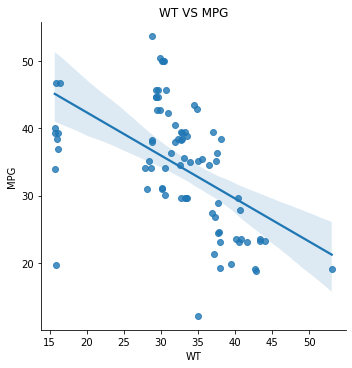

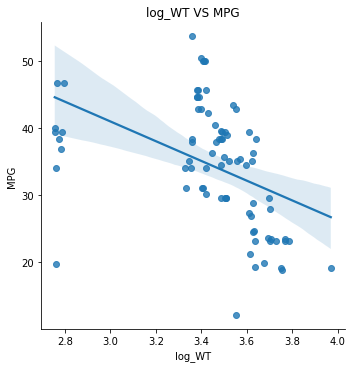

In [98]:
# Now here we will compare "WT vs MPG" and "logWT vs MPG"

sns.lmplot(x="WT",y="MPG",data=X_inputs)
plt.title("WT VS MPG")

sns.lmplot(x="log_WT",y="MPG",data=X_inputs)
plt.title("log_WT VS MPG")
plt.show()

In [99]:
# MODEL BUILDING USING SKLEARN LIBRARY

X=X_inputs[['log_HP','log_VOL','log_SP','log_WT']]
y=X_inputs[['MPG']]

In [100]:
X.shape,y.shape

((81, 4), (81, 1))

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,shuffle=True,random_state=123)

In [102]:
X_train.shape,y_train.shape

((64, 4), (64, 1))

In [103]:
X_test.shape,y_test.shape

((17, 4), (17, 1))

In [104]:
X_train

,log_HP,log_VOL,log_SP,log_WT
19,4.499810,4.634729,4.774685,3.512052
70,5.634790,3.912023,5.103509,2.761468
79,5.686975,4.779123,5.123633,3.674352
78,5.572154,3.912023,5.021236,2.758086
45,4.605170,4.595120,4.763071,3.484984
...,...,...,...,...
73,4.941642,5.075174,4.826033,3.970250
47,4.584967,4.634729,4.757659,3.523712
57,4.744932,4.615121,4.773131,3.488430
17,4.521789,3.912023,4.767276,2.784648


In [105]:
y_train

,MPG
19,38.901834
70,19.678507
79,19.833733
78,34.000000
45,34.561499
...,...
73,19.086341
47,35.052330
57,29.629936
17,39.354094


In [106]:
from sklearn.linear_model import LinearRegression
linear_model_4=LinearRegression()

# Training the data ,Here we will have training log transformed inputs

linear_model_4.fit(X_train,y_train)

LinearRegression()

In [107]:
# MODEL TESTING AND EVALUATION

#Caluculating the data for Training data

y_pred_train=linear_model_4.predict(X_train)
y_pred_train

array([[38.98074852],
       [26.16964945],
       [18.96624157],
       [22.20270373],
       [34.00669232],
       [20.27273965],
       [49.40177918],
       [26.97020068],
       [24.69611009],
       [35.18473247],
       [24.71966553],
       [38.74973137],
       [44.63058509],
       [29.27113627],
       [42.65925186],
       [38.7692648 ],
       [49.50082045],
       [25.99413767],
       [31.52954132],
       [42.69846412],
       [23.46090565],
       [42.40764362],
       [42.84416844],
       [38.3195017 ],
       [42.85393626],
       [29.14409526],
       [43.06561723],
       [53.62138443],
       [45.73726176],
       [33.84156539],
       [45.67683632],
       [34.54125352],
       [40.41883285],
       [31.60676243],
       [38.38677149],
       [38.45196743],
       [37.61947139],
       [26.24445428],
       [41.0442127 ],
       [34.99283201],
       [33.86700927],
       [29.44834682],
       [46.20416339],
       [36.97730894],
       [34.56624305],
       [47

In [108]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [109]:
mean_squared_error(y_train,y_pred_train)

4.296945401657056

In [110]:
mean_absolute_error(y_train,y_pred_train)

1.1439718787015412

In [111]:
# MODEL TESTING AND EVALUATION

#Caluculating the data for Training data

y_pred_test=linear_model_4.predict(X_test)
y_pred_test

array([[23.61091525],
       [22.72374992],
       [50.45575782],
       [14.23645417],
       [35.28931832],
       [23.8269475 ],
       [38.46193525],
       [34.37191821],
       [22.22087697],
       [37.36995404],
       [46.95599032],
       [35.07657455],
       [42.0732075 ],
       [21.92564673],
       [32.0736171 ],
       [26.2198775 ],
       [40.0488733 ]])

In [112]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [113]:
mean_squared_error(y_test,y_pred_test)

24.857528912372068

In [114]:
mean_absolute_error(y_test,y_pred_test)

2.4650538124660044

In [115]:
# MODEL BUILDING USING STATS LIBRARY

import statsmodels.formula.api as smf
model_1 = smf.ols(formula = 'MPG~ log_HP',data=X_inputs).fit()

print("R2 SCORE                    :",round(model_1.rsquared,5)) # contribution of input featre towards the prediction.
print("ADJUSTED R2 SCORE           :",round(model_1.rsquared_adj,5))  # contribution of input featre towards the prediction if it is really required.
print("AIC                         :",round(model_1.aic,5))
print("BIC                         :",round(model_1.bic,5))

# When we are using 1 input feature after performing log transformation.The contribution is increased to 71%.
# And the adjusted rsquare is also contributing 70%.


R2 SCORE                    : 0.71141
ADJUSTED R2 SCORE           : 0.70776
AIC                         : 490.49861
BIC                         : 495.28751


In [116]:
import statsmodels.formula.api as smf
model_2 = smf.ols(formula = 'MPG~ log_HP+log_SP',data=X_inputs).fit()

print("R2 SCORE                    :",round(model_2.rsquared,5)) # contribution of input featre towards the prediction.
print("ADJUSTED R2 SCORE           :",round(model_2.rsquared_adj,5))  # contribution of input featre towards the prediction if it is really required.
print("AIC                         :",round(model_2.aic,5))
print("BIC                         :",round(model_2.bic,5))

R2 SCORE                    : 0.80795
ADJUSTED R2 SCORE           : 0.80302
AIC                         : 459.51147
BIC                         : 466.69481


In [117]:
import statsmodels.formula.api as smf
model_3 = smf.ols(formula = 'MPG~ log_HP+log_SP+log_WT',data=X_inputs).fit()

print("R2 SCORE                    :",round(model_3.rsquared,5)) # contribution of input featre towards the prediction.
print("ADJUSTED R2 SCORE           :",round(model_3.rsquared_adj,5))  # contribution of input featre towards the prediction if it is really required.
print("AIC                         :",round(model_3.aic,5))
print("BIC                         :",round(model_3.bic,5))

R2 SCORE                    : 0.91158
ADJUSTED R2 SCORE           : 0.90814
AIC                         : 398.68076
BIC                         : 408.25856


In [118]:
import statsmodels.formula.api as smf
model_4 = smf.ols(formula = 'MPG~ log_HP+log_SP+log_WT+log_VOL',data=X_inputs).fit()

print("R2 SCORE                    :",round(model_4.rsquared,5)) # contribution of input featre towards the prediction.
print("ADJUSTED R2 SCORE           :",round(model_4.rsquared_adj,5))  # contribution of input featre towards the prediction if it is really required.
print("AIC                         :",round(model_4.aic,5))
print("BIC                         :",round(model_4.bic,5))

R2 SCORE                    : 0.91178
ADJUSTED R2 SCORE           : 0.90713
AIC                         : 400.50134
BIC                         : 412.47358


In [119]:
# So finally from all the 4 models .Model 3 is the best model as it is having highest rsquare and adjusted rsquare value when compared to all the other models.
# And the aic and bic values are less when compared to all the other models.